# Submission frequency
<a id='top'></a>

Inspect post frequency trends of a subreddit. The histogram at the end shows number of posts submitted to  subreddit in 2020 - before and after national lockdowns.

## Set up

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.abspath(''), ".."))
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from modules import PushshiftAPI, RedditAPI, DataContext
from modules import load_posts, Bin, Plot

## Subreddit name and dates

In [2]:
# subreddit to analyse
subreddit_name = "buildaPC"

# date range to download
daterange = [
    datetime.utcnow().timestamp(),
    datetime(2020, 1, 1, 0, 0, 0).timestamp(),
]

# if the posts are not in the database they will be downloaded
# set this to "True" to update them
update_posts = False

## Fetch the posts

This might take some time depending on the subreddit's popularity and the date range specified above.

In [3]:
with DataContext() as context:
    posts = context.select_posts(subreddit_name=subreddit_name)

if update_posts or len(posts) == 0:
    load_posts(subreddit_name, daterange, PushshiftAPI(), RedditAPI(), progress=True)
    with DataContext() as context:
        posts = context.select_posts(subreddit_name=subreddit_name, include_removed=False)

print(f"Fetched {len(posts)} posts.")

Fetched 375600 posts.


## Plot the results

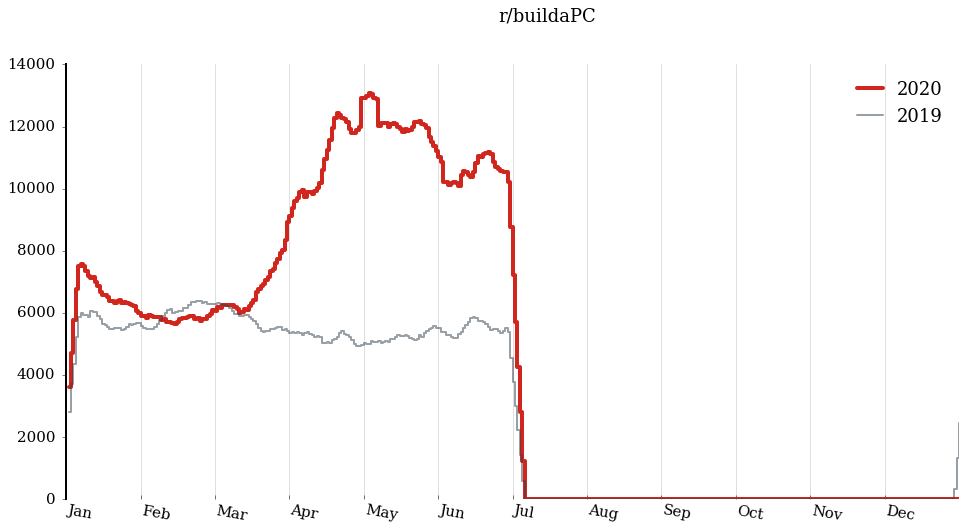

In [4]:
years = [2020, 2019]
f = plt.figure(figsize=(16, 8))
for year in years:
    t, v = Bin.posts(
        posts,
        start   = datetime(year, 1, 1, 0, 0, 0),
        end     = datetime(year, 12, 31, 23, 59, 59),
        binsize = timedelta(days=7),
        step    = timedelta(days=1)
    )
    Plot.timeseries_yearly(t, v, year, accent=year==2020)
    
t = f.suptitle(f"r/{subreddit_name}", ha="left")
# TODO: do this for lockdown range:
# https://stackoverflow.com/questions/8500700/how-to-plot-a-gradient-color-line-in-matplotlib